In [ ]:
## 자동차 사고(Car Crash)에 관한 DataSet 

### Total : 총 사고 횟수
### Speeding : 과속 사고 평균
### Alchol : 음주 사고의 평균
### Not_distracted : 부주의 사고 평균
### No_previous : 첫 사고 평균 
### ins_premium : 보험료
### ins_losses : 보험 손실(?)
### abbrev : 지역명약자


###### 1. CarCrash 데이터 셋을 로드하여 df1에 저장하여 보세요


In [13]:
import pandas as pd
import seaborn as sns

# CarCrash 데이터셋 로드
df1 = sns.load_dataset('car_crashes')
print(df1.head())


   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  


###### 2. df1에서 1~5열만 필터링한 df2라는 데이터 셋을 만들어 보세요.


In [15]:
df2 = df1.iloc[:,1:6]
print(df2.head())

   speeding  alcohol  not_distracted  no_previous  ins_premium
0     7.332    5.640          18.048       15.040       784.55
1     7.421    4.525          16.290       17.014      1053.48
2     6.510    5.208          15.624       17.856       899.47
3     4.032    5.824          21.056       21.280       827.34
4     4.200    3.360          10.920       10.680       878.41


###### 3. 변수들 사이에 어떤 상관관계가 있는지 상관분석을 해보세요.(상관분석 결과를 dfm 변수에 저장).     no_previous 변수와 가장 상관계수가 높은 변수는 무엇인가요?


In [17]:
import seaborn as sns

# car_crashes 데이터셋 로드
df1 = sns.load_dataset('car_crashes')

# df1에서 1~6열 필터링하여 df2 생성
df2 = df1.iloc[:, 1:6]

# 상관 분석
dfm = df2.corr()

# 결과 출력
print(dfm)

                speeding   alcohol  not_distracted  no_previous  ins_premium
speeding        1.000000  0.669719        0.588010     0.571976    -0.077675
alcohol         0.669719  1.000000        0.732816     0.783520    -0.170612
not_distracted  0.588010  0.732816        1.000000     0.747307    -0.174856
no_previous     0.571976  0.783520        0.747307     1.000000    -0.156895
ins_premium    -0.077675 -0.170612       -0.174856    -0.156895     1.000000


###### 4. dfm 의 데이터로 히트맵을 그려보세요


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'speeding'),
  Text(1.5, 0, 'alcohol'),
  Text(2.5, 0, 'not_distracted'),
  Text(3.5, 0, 'no_previous'),
  Text(4.5, 0, 'ins_premium')])

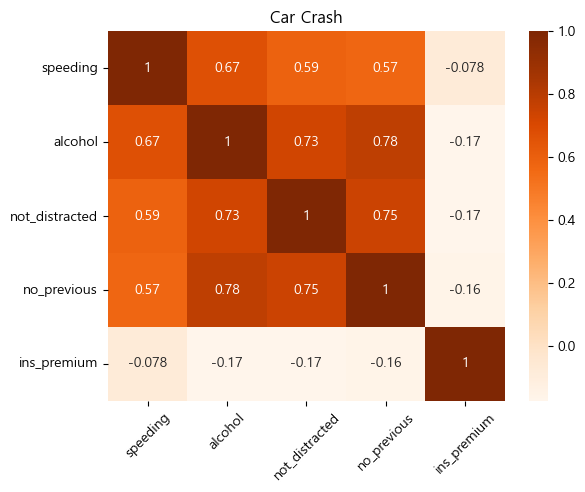

In [29]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')                 # 한글처리위함
plt.rcParams['axes.unicode_minus'] = False    #축의 음수 기호 표시


sns.heatmap(dfm, annot=True, cmap='Oranges')
plt.title('Car Crash')
plt.xticks(rotation=45)

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'speeding'),
  Text(1.5, 0, 'alcohol'),
  Text(2.5, 0, 'not_distracted'),
  Text(3.5, 0, 'no_previous'),
  Text(4.5, 0, 'ins_premium')])

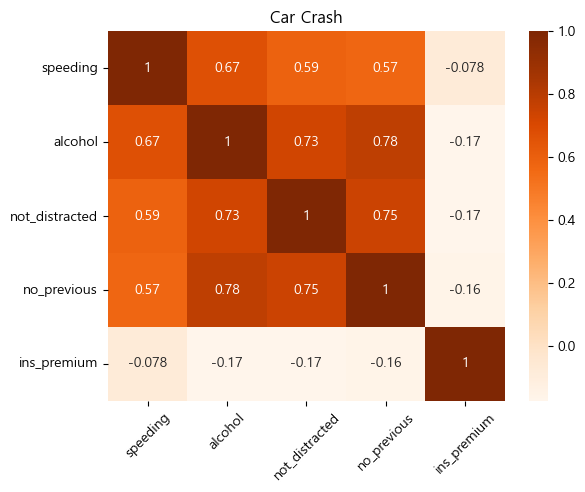

In [30]:
sns.heatmap(dfm, annot=True, cmap='Oranges')
plt.title('Car Crash')
plt.xticks(rotation=45)

###### 5. df2 의 no_previous(처음 사고)를 종속변수(y)로 하고, alcohol 과 not_distracted 를 독립변수(x)로 하는 다중 선형 회귀분석을 실시한 뒤 나온 R-squared 값과 회귀식을 구해 보세요


In [20]:
import statsmodels.formula.api as smf

m1 = smf.ols(formula = 'no_previous~ alcohol + not_distracted ',data = df2)

result_m1 = m1.fit()

result_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            no_previous   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     50.68
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           1.47e-12
Time:                        15:45:24   Log-Likelihood:                -110.52
No. Observations:                  51   AIC:                             227.0
Df Residuals:                      48   BIC:                             232.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.3464      1.016      4.279      0.000       2.304       6.389
alcohol            1.1093      0.262      4.237      0.000       0.583       1.636
not_distracted     0.3122      0.100      3.110      0.003       0.110       0.514
==============================================================================
Omnibus:                        5.677   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.690
Skew:                           0.712   Prob(JB):                       0.0958
Kurtosis:                       3.425   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""